## Regressão Linear 

In [50]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [34]:
# definindo as variaveis
idade = [18, 25, 57, 45, 26, 64, 37, 40, 24, 33] # variavel independete
salarioAnual = [15000, 29000, 68000, 52000, 32000, 80000, 41000, 45000, 26000, 33000] # variavel independete

xData = np.array(idade) # transformando a lista idade em um array
yData = np.array(salarioAnual) # transformando a lista salarioAnual em array

In [35]:
# Define função para ser otimizada (regressão linear)
def equacaoLinear(x, a, b):
    return a * x + b

In [36]:
# gera parametros iniciais para o otimizador
parametrosIniciais = np.array([1.0, 1.0])

In [37]:
# realiza a otimização atraves do erro médio quadrado (MSE)
# parametrosOtimizados - contém as parametros de ajuste da curva
# pcov - contem a covariancia dos parametros encontrados
parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData, parametrosIniciais)

In [38]:
# realiza a previsão dos dados atraves do modelo (constroi a equação linear)
previsaoModelo = equacaoLinear(xData, * parametrosOtimizados)

In [39]:
# encontra o erro absoluto (linhas verticais)
erroAbsoluto = previsaoModelo - yData

In [40]:
# calcula o erro quadrado entre cada media
SE = np.square(erroAbsoluto)
MSE = np.mean(SE)
print('SE', SE)
print('MSE', MSE)

SE [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE 5479238.909036714


In [41]:
# realiza o calculo do coeficiente de determinação (R Quadrado)
Rsquared = 1.0 - (np.var(erroAbsoluto) / np.var(yData))
print('Coeficiente de Determinação', Rsquared)

Coeficiente de Determinação 0.9846300347582353


In [42]:
# mostra os parametros da regressão
print('Y = {}, X = {}'.format(parametrosOtimizados[0], parametrosOtimizados[1]))

Y = 1320.5325666669085, X = -6627.651716729711


Text(0, 0.5, 'Salario Anual (R$)')

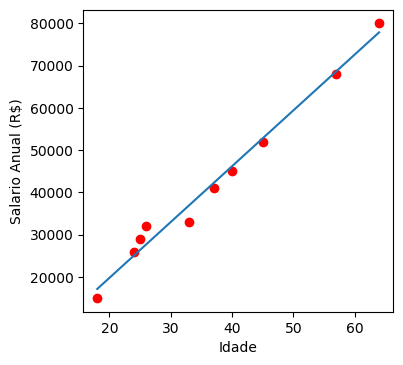

In [43]:
# realiza o plot da figura
f = plt.figure(figsize = (4, 4), dpi = 100)
axes = f.add_subplot(111)

# realiza o plot dos dados (pontos graficos)
axes.plot(xData, yData, 'ro')

# cria os dados para serem utilizados na construção da linha
xModel = np.linspace(min(xData), max(xData))
yModel = equacaoLinear(xModel, * parametrosOtimizados)

# realiza o plot da linha
axes.plot(xModel, yModel)
plt.xlabel('Idade')
plt.ylabel('Salario Anual (R$)')

## Agora vamos fazer a regressão usando SKLearn

In [44]:
# importando as função do sklearn de regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
reg = LinearRegression() # obj para regressão linear
x_ModelSklern = xData.reshape((-1, 1)) # na regressão linear é necessário que o X seja 2D
regressao = reg.fit(x_ModelSklern, yData) # realiza a regressão

In [46]:
previsao = reg.predict(x_ModelSklern)

In [47]:
MSE = mean_squared_error(yData, previsao)
print('MSE', MSE)

MSE 5479238.909036713


In [48]:
# mostra os parametros da regressão
print('Y = {}, X = {}'.format(reg.coef_, reg.intercept_))

from sklearn.metrics import r2_score

R_2 = r2_score(yData, previsao)

print('Coeficiente de Determinação(R2)', R_2)

Y = [1320.53256496], X = -6627.651646877632
Coeficiente de Determinação(R2) 0.9846300347582353


## Usando regressão em uma base real

In [54]:
# realiza leitura do dados
data = pd.read_csv('Dataset/headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [55]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [56]:
# realiza a construção da regressão linear
reg = LinearRegression()
x_Reshaped = x.reshape((-1, 1))
regressao = reg.fit(x_Reshaped, y)

In [57]:
# realiza a previsão
previsao = reg.predict(x_Reshaped)

In [60]:
# mostra os parametros da regressão
print('Y = {}, X = {}'.format(reg.coef_, reg.intercept_))

from sklearn.metrics import r2_score

R_2 = r2_score(y, previsao)

print('Coeficiente de Determinação(R2)', R_2)

Y = [0.26342934], X = 325.5734210494428
Coeficiente de Determinação(R2) 0.639311719957


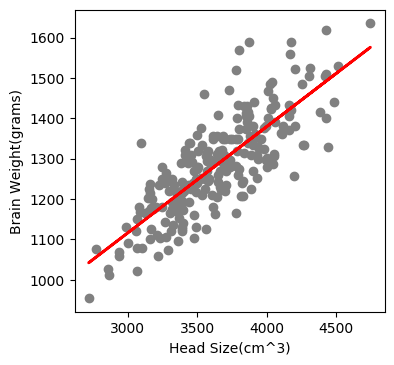

In [62]:
# realiza plot dos dados
plt.figure(figsize = (4, 4), dpi = 100)
plt.scatter(x, y, color = 'gray')
plt.plot(x, previsao, color = 'red', linewidth = 2)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()